In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NYCrash_df = pd.read_csv("Resources/NYC_accidents_2020.csv")
NYCrash_df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2020-08-29,15:40:00,BRONX,10466.0,40.89210,-73.833760,POINT (-73.83376 40.8921),PRATT AVENUE,STRANG AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4342908,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
1,2020-08-29,21:00:00,BROOKLYN,11221.0,40.69050,-73.919914,POINT (-73.919914 40.6905),BUSHWICK AVENUE,PALMETTO STREET,NaN,...,Unspecified,NaN,NaN,NaN,4343555,Sedan,Sedan,NaN,NaN,NaN
2,2020-08-29,18:20:00,NaN,NaN,40.81650,-73.946556,POINT (-73.946556 40.8165),8 AVENUE,NaN,NaN,...,NaN,NaN,NaN,NaN,4343142,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,NaN
3,2020-08-29,00:00:00,BRONX,10459.0,40.82472,-73.892960,POINT (-73.89296 40.82472),NaN,NaN,1047 SIMPSON STREET,...,Unspecified,Unspecified,Unspecified,NaN,4343588,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,Sedan,Motorcycle,NaN
4,2020-08-29,17:10:00,BROOKLYN,11203.0,40.64989,-73.933890,POINT (-73.93389 40.64989),NaN,NaN,4609 SNYDER AVENUE,...,Unspecified,NaN,NaN,NaN,4342953,Sedan,Sedan,NaN,NaN,NaN


In [3]:
NYCrash_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [4]:
summary_df = NYCrash_df.describe()
summary_df.columns

Index(['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'COLLISION_ID'],
      dtype='object')

In [5]:
summary_df = summary_df.drop(columns=['ZIP CODE', 'LATITUDE', 'LONGITUDE', 'COLLISION_ID'])
summary_df

,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED
count,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000,74881.000000
mean,0.366555,0.001923,0.054740,0.000748,0.043709,0.000120,0.268105,0.001055
std,0.726178,0.047609,0.237582,0.027337,0.209737,0.010963,0.691423,0.037073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,15.000000,4.000000,6.000000,1.000000,3.000000,1.000000,15.000000,4.000000


### Which Borough Has The Most Traffic Accidents?

In [35]:
borough = NYCrash_df.groupby('BOROUGH')
borough['BOROUGH'].count()

BOROUGH
BRONX             9417
BROOKLYN         16907
MANHATTAN         7353
QUEENS           14017
STATEN ISLAND     1446
Name: BOROUGH, dtype: int64

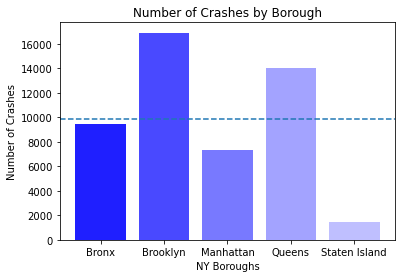

In [55]:
group_names = ['Bronx','Brooklyn', 'Manhattan','Queens','Staten Island']
plt.bar(group_names, borough['BOROUGH'].count(),color=("#1F1FFF","#4949FF","#7879FF","#A3A3FF", "#BFBFFF"))
plt.title("Number of Crashes by Borough")
plt.xlabel("NY Boroughs")
plt.ylabel("Number of Crashes")
plt.savefig('Output/NY_CrashCountByBorough.png')
plt.axhline(borough.size().mean(), ls="--")
plt.show()

### What Time Of The Year Was There The Most Amount of Crashes? 

In [8]:
NYCrash_df["CRASH DATE"] = pd.to_datetime(NYCrash_df["CRASH DATE"])
NYCrash_df["MONTH"] = NYCrash_df["CRASH DATE"].dt.month

In [13]:
monthly_crashStat = NYCrash_df.groupby("MONTH")
monthly_crashStat['MONTH'].count()

MONTH
1    14287
2    13684
3    11057
4     4116
5     6149
6     7616
7     9225
8     8747
Name: MONTH, dtype: int64

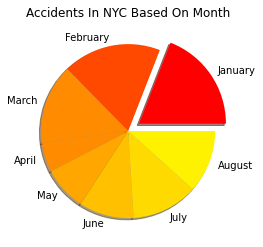

In [63]:
month_labels = ['January', "February", "March", "April", "May","June","July","August"]
month_crashVals = monthly_crashStat['MONTH'].count()
monthlyExplode = [.15,0,0,0,0,0,0,0]
plt.pie(month_crashVals, labels= month_labels, shadow= True, colors=("#ff0000", "#ff4900", "#ff8b00","#ff8b00","#ffa600","#ffc000","#ffda00","#fff200"), explode=monthlyExplode)
plt.title("Accidents In NYC Based On Month")
plt.savefig('Output/MonthlyCrashAnalysis.png')
plt.show()

### What Time Of The Day Are There Most Traffic Accidents? 

In [39]:
NYCrash_df["HOUR"] = pd.to_datetime(NYCrash_df["CRASH TIME"]).dt.hour
hourly_crashStat = NYCrash_df.groupby("HOUR")
hourly_crashStat['HOUR'].count()

HOUR
0     2948
1     1474
2     1139
3      989
4      975
5     1178
6     1868
7     2463
8     3678
9     3439
10    3525
11    3803
12    4054
13    4458
14    5016
15    4677
16    5219
17    4974
18    4696
19    3738
20    3138
21    2711
22    2557
23    2164
Name: HOUR, dtype: int64

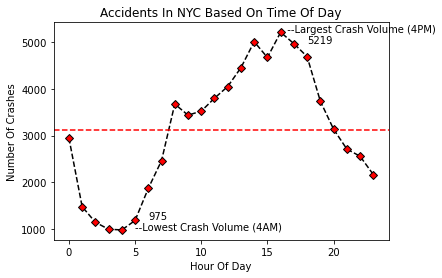

In [90]:
plt.plot(range(0,24), hourly_crashStat['HOUR'].count(), ls="--", marker="D", markerfacecolor="red",color="black")
plt.axhline(hourly_crashStat.size().mean(), ls="--", color="red")
plt.title("Accidents In NYC Based On Time Of Day")
plt.xlabel("Hour Of Day")
plt.ylabel("Number Of Crashes")
plt.annotate(xy=[5,hourly_crashStat['HOUR'].count().min()], text = "--Lowest Crash Volume (4AM)")
plt.annotate(xy=[6,1200], text = hourly_crashStat['HOUR'].count().min())
plt.annotate(xy=[16, hourly_crashStat['HOUR'].count().max()], text = "  --Largest Crash Volume (4PM)")
plt.annotate(xy=[18, 4990], text = hourly_crashStat['HOUR'].count().max())
plt.savefig('Output/NY_CrashCountByTime.png')
plt.show()

### Is It Dangerous To Bike In NY? 

In [92]:
NYCrash_df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'MONTH', 'HOUR'],
      dtype='object')